In [13]:
pip install pandas

     --------------------------------------- 11.6/11.6 MB 43.7 MB/s eta 0:00:00
     ------------------------------------- 505.5/505.5 kB 15.5 MB/s eta 0:00:00
     ------------------------------------- 346.6/346.6 kB 21.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

In [10]:
# import some data to play with
iris = datasets.load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [11]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
# Creamos un dataframe con los datos de iris
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df

C:\Users\sonya\AppData\Local\Temp\ipykernel_28148\1837650624.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
Y = iris.target

### Serie de pandas para la variable dependiente

Y_df = pd.Series(Y, name='species')
Y_df

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [16]:
## Importamos train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_df, Y_df, test_size=0.3, random_state=42)

In [17]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [18]:
modelo_log_iris = LogisticRegression(random_state=42, max_iter=1000)

In [19]:
modelo_log_iris.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [12]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, modelo_log_iris.predict_proba(X_train)[:,1])

### Graficamos la curva ROC

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curve')

plt.show()

ValueError: multiclass format is not supported

Accuracy: 1.0
AUC-ROC Score: 1.0


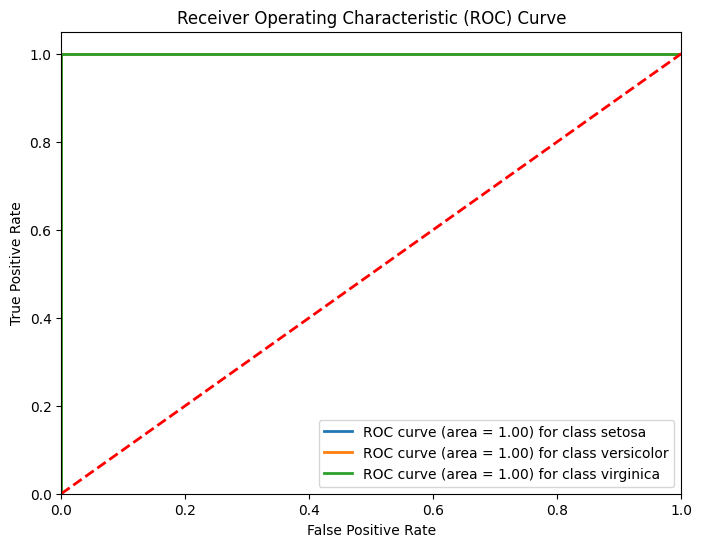

In [27]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc
import pandas as pd
import numpy as np

# Carga del conjunto de datos
iris = datasets.load_iris()

# Creación de un DataFrame con los datos de iris
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Serie de pandas para la variable dependiente
Y_df = pd.Series(iris.target, name='species')

# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(iris_df, Y_df, test_size=0.3, random_state=42)

# Entrenamiento del modelo de regresión logística
modelo_log_iris = LogisticRegression(random_state=42, max_iter=1000)
modelo_log_iris.fit(X_train, y_train)

# Predicciones en datos de prueba
y_pred = modelo_log_iris.predict(X_test)

# Evaluación del rendimiento
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calcular la puntuación AUC-ROC
y_prob = modelo_log_iris.predict_proba(X_test)
auc_roc = roc_auc_score(y_test, y_prob, multi_class='ovo') # Estrategia uno contra uno
print("AUC-ROC Score:", auc_roc)

# Trazar la curva ROC
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(iris.target_names)):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(len(iris.target_names)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (area = {roc_auc[i]:0.2f}) for class {iris.target_names[i]}')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

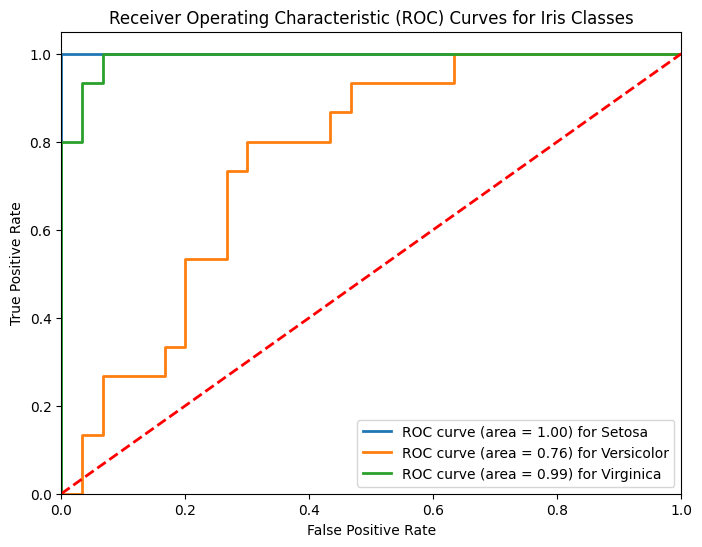

In [28]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import pandas as pd

# Cargar el conjunto de datos iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Dividir los datos en conjunto de entrenamiento y prueba
# Dividir los datos en conjunto de entrenamiento y prueba de manera estratificada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar un modelo para la clase Setosa
model_setosa = LogisticRegression(random_state=42, max_iter=1000)
model_setosa.fit(X_train, y_train == 0)

# Entrenar un modelo para la clase Versicolor
model_versicolor = LogisticRegression(random_state=42, max_iter=1000)
model_versicolor.fit(X_train, y_train == 1)

# Entrenar un modelo para la clase Virginica
model_virginica = LogisticRegression(random_state=42, max_iter=1000)
model_virginica.fit(X_train, y_train == 2)


#model_versicolor = LogisticRegression(random_state=42, max_iter=1000)
#model_virginica = LogisticRegression(random_state=42, max_iter=1000)

# Filtrar los datos para cada clase
# Filtrar los datos para la clase Setosa y convertirlos en un DataFrame
#X_train_setosa = pd.DataFrame(X_train[y_train == 0], columns=iris.feature_names)
#X_train_versicolor = pd.DataFrame(X_train[y_train == 1], columns=iris.feature_names)
#X_train_virginica = pd.DataFrame(X_train[y_train == 2], columns=iris.feature_names)

# Entrenar los modelos para cada clase
#model_setosa.fit(X_train_setosa, y_train[y_train == 0])
#model_versicolor.fit(X_train_versicolor, y_train[y_train == 1])
#model_virginica.fit(X_train_virginica, y_train[y_train == 2])

# Calcular las probabilidades de predicción para cada clase en los datos de prueba
y_prob_setosa = model_setosa.predict_proba(X_test)[:, 1]
y_prob_versicolor = model_versicolor.predict_proba(X_test)[:, 1]
y_prob_virginica = model_virginica.predict_proba(X_test)[:, 1]

# Calcular las curvas ROC y los AUC para cada clase
fpr_setosa, tpr_setosa, _ = roc_curve(y_test, y_prob_setosa, pos_label=0)
fpr_versicolor, tpr_versicolor, _ = roc_curve(y_test, y_prob_versicolor, pos_label=1)
fpr_virginica, tpr_virginica, _ = roc_curve(y_test, y_prob_virginica, pos_label=2)

auc_setosa = auc(fpr_setosa, tpr_setosa)
auc_versicolor = auc(fpr_versicolor, tpr_versicolor)
auc_virginica = auc(fpr_virginica, tpr_virginica)

# Trazar las curvas ROC para cada clase
plt.figure(figsize=(8, 6))
plt.plot(fpr_setosa, tpr_setosa, lw=2, label=f'ROC curve (area = {auc_setosa:0.2f}) for Setosa')
plt.plot(fpr_versicolor, tpr_versicolor, lw=2, label=f'ROC curve (area = {auc_versicolor:0.2f}) for Versicolor')
plt.plot(fpr_virginica, tpr_virginica, lw=2, label=f'ROC curve (area = {auc_virginica:0.2f}) for Virginica')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Iris Classes')
plt.legend(loc="lower right")
plt.show()